In [92]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import csv

# Project Objective: Create charts and graphs to show the correlation between Nissan Model and Resale Price.

Used Nissan Car Price Analysis and Recommendation

1. Problem:
Shopping for a used vehicle can be difficult. You want to make the best investment, but it's hard to know if you are getting the best price/value or if there are other vehicles listed that best suit your needs.  

2. Goal:
What used Nissan car do we recommend user should buy within their ** qualifiers: budget, mileage, and geographical location of listing. ** (need to define)
Is the asking price for this particular car reasonable given the information provided in the dataset. 
What are other vehicles could we recommend? (Slightly overbudget, higher mileage, outside geographic location.)

3. Data:
This data was obtained on https://www.kaggle.com/jpayne/852k-used-car-listings#true_car_listings.csv and contains the following limitations:

    - Only used cars made by Nissan
    - Model years between 1997-2017
    - Listings that were live on September 24, 2017

Data included: year, make, model, price, VIN, city, state

# Project Objective: Create charts and graphs to show the correlation between Nissan Model and Resale Price.

In [93]:
df=pd.read_csv("Data/Cleaned_Data.csv")
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [94]:
cdf=df.drop(
    columns=[col for col in df.columns
        if col in
        ["Model","Make","City","State","Vin"]]
)
cdf.head()

,Price,Year,Mileage,New_Model
0,5490,2009,10,Altima
1,10588,2016,2790,Altima
2,6998,2013,32205,Altima
3,8950,2017,7995,Sentra
4,9990,2016,24978,Altima


In [95]:
cdf.Price.corr(cdf.Mileage)

-0.50550984184065

In [96]:
cdf.Price.corr(cdf.Year)

0.47992532541136346

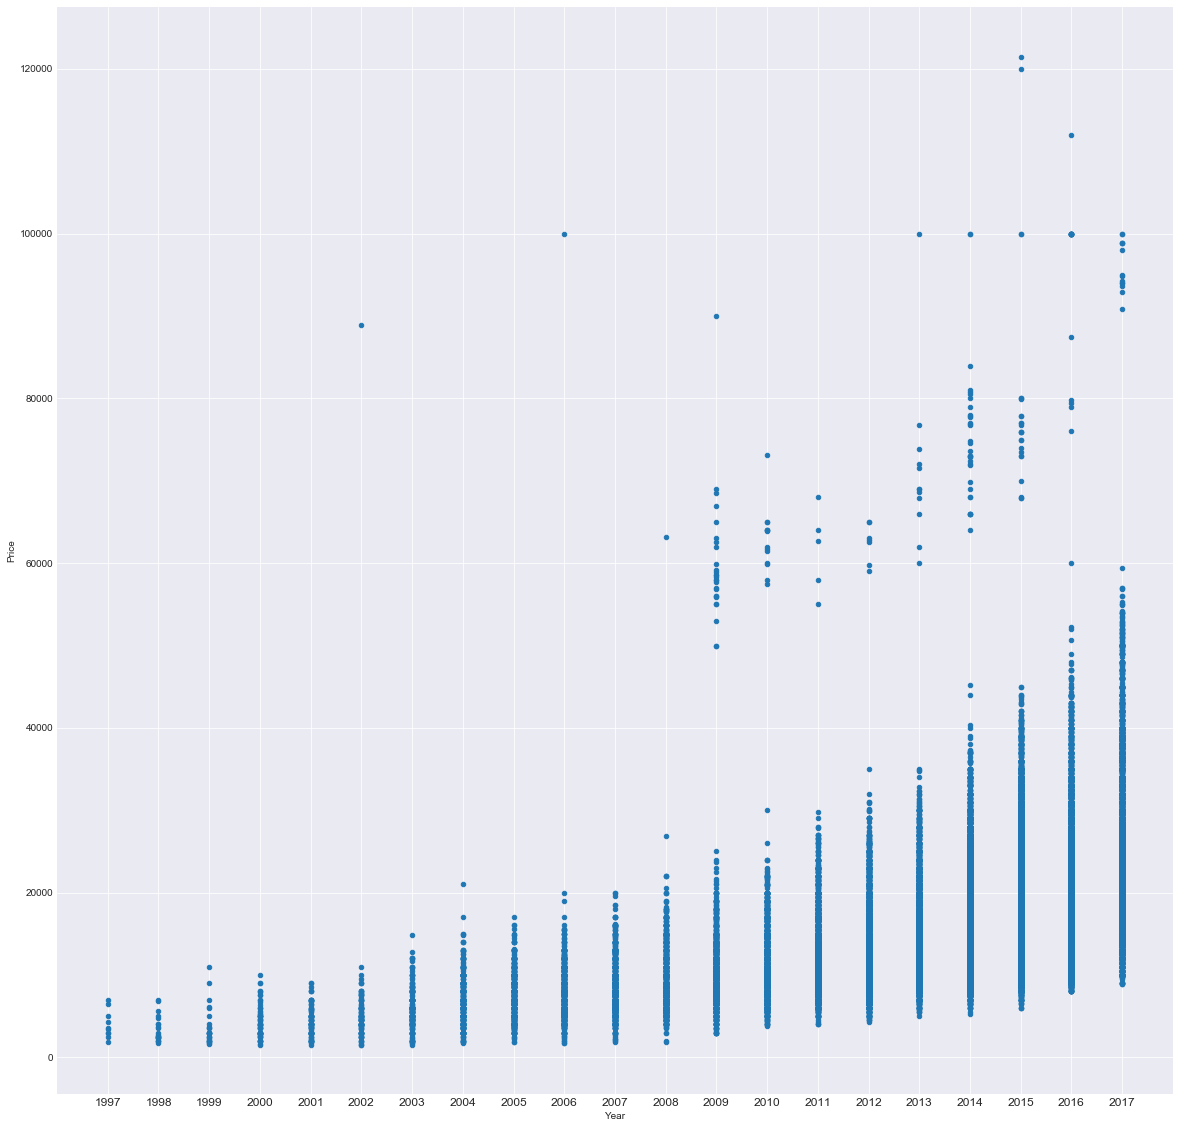

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [97]:
x = "Year"
y="Price"
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line= "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
scatterplot = cdf.plot(kind="scatter", x=x, y=y, figsize = (20,20), grid=True)
plt.xticks((df.Year).unique(), fontsize=12)

plt.show()

plt.tight_layout

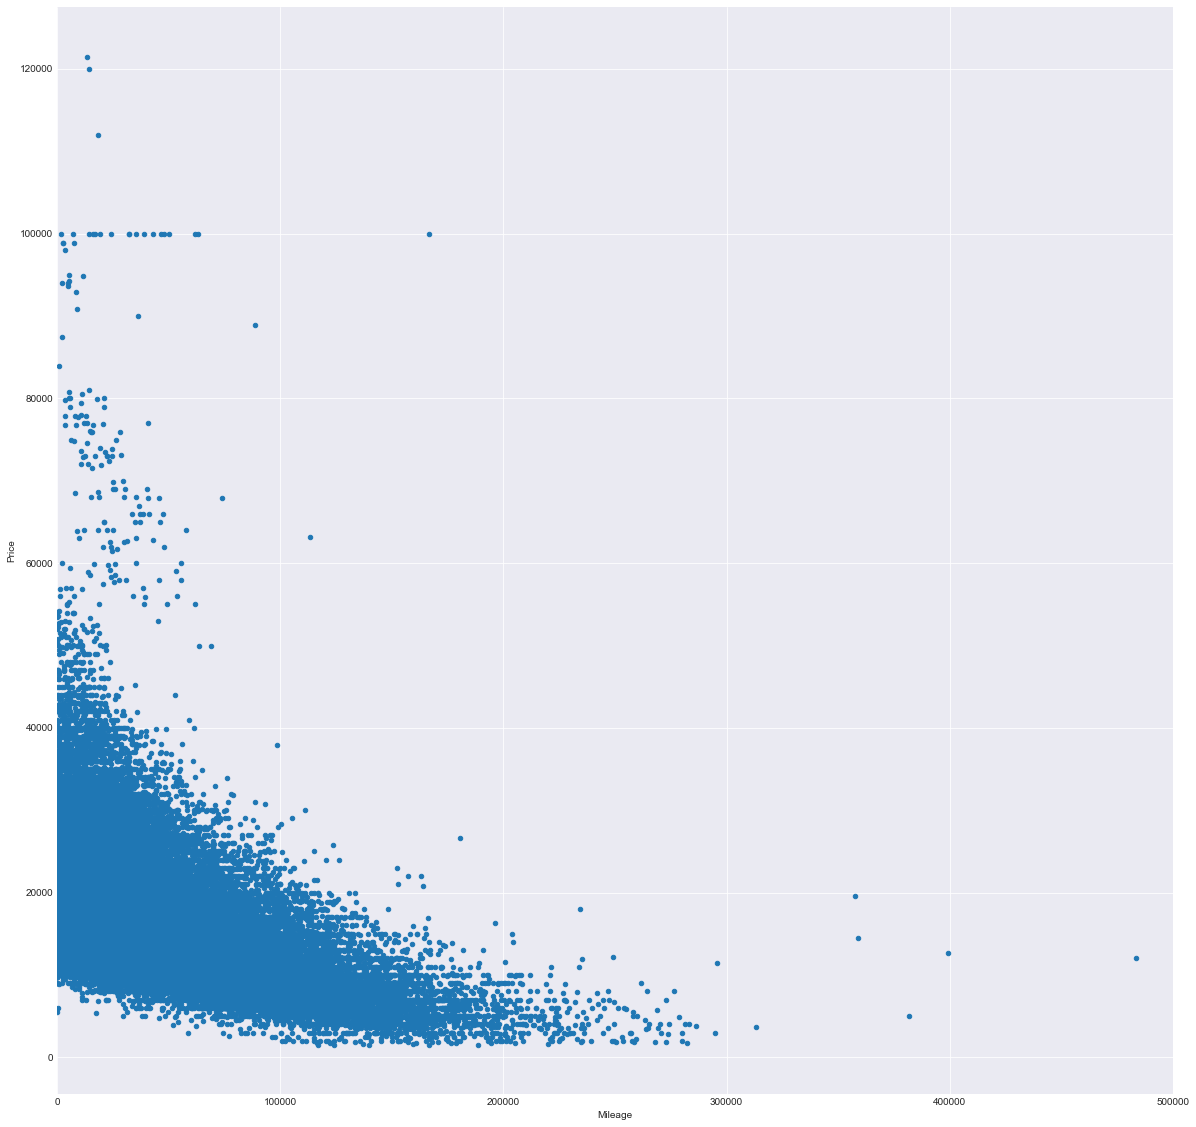

In [98]:
x = "Mileage"
y="Price"
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line= "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
scatterplot = cdf.plot(kind="scatter", x=x, y=y, figsize = (20,20), grid=True)
plt.xlim(0, 500000)
plt.show()

In [99]:
cdf.cov()

,Price,Year,Mileage
Price,5.566421e+07,10181.196007,-1.411125e+08
Year,1.018120e+04,8.084892,-8.399238e+04
Mileage,-1.411125e+08,-83992.383694,1.399896e+09


# Overview of Nissan Model Resale Value

In [100]:
# Name the dataframe for cleaned data csv
car_df = "Data/Cleaned_Data.csv"

# Read the data 
car_df = pd.read_csv(car_df)

# Print 
car_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [101]:
# remove duplicates and print results after drop
print ("%s rows before drops" % car_df.shape[0])
car_df.Make.dropna()
car_df.New_Model.dropna()

# values of "" need to be explicitly converted to NaN before being dropped
car_df.Make.replace('', np.nan, inplace=True)
car_df.dropna(subset=['New_Model'], inplace=True)
print ("\n%s rows after drops" % car_df.shape[0])

66250 rows before drops

59032 rows after drops


In [102]:
print ('Number of unique years is %s' % len(car_df.Year.unique()))
print ('Number of unique models is %s' % len(car_df.Model.unique()))

Number of unique years is 21
Number of unique models is 111


In [103]:
# Using astype() to convert a column's data into floats
car_df.loc[:,"Price"] = car_df["Price"].astype("float")
car_df.dtypes

Price        float64
Year           int64
Mileage        int64
City          object
State         object
Vin           object
Make          object
Model         object
New_Model     object
dtype: object

In [104]:
# find the count of vehicles listed by model
model_counts = car_df['New_Model'].value_counts()
model_counts

# Convert the model_counts Series into a DataFrame
model_counts = pd.DataFrame(model_counts)
model_counts.head(20)

,New_Model
Altima,15967
Rogue,10491
Sentra,7664
Versa,5510
Pathfinder,4434
Murano,4338
Maxima,3785
Titan,1994
Armada,1334
Quest,1033


In [105]:
# Swap 'Model' from rows to columns by using unstack
model_counts_unstack = model_counts.stack(level=0).unstack(level=0)

# Print result
model_counts_unstack.head()

,Altima,Rogue,Sentra,Versa,Pathfinder,Murano,Maxima,Titan,Armada,Quest,Xterra,370Z,NV,GT-R
New_Model,15967,10491,7664,5510,4434,4338,3785,1994,1334,1033,938,902,505,137


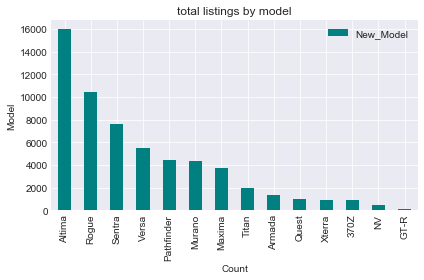

In [106]:
# Create a bar chart from the 'New_Model' df and add title with `DataFrame.plot()`
chart_df = model_counts.plot(kind='bar', title='total listings by model', color='teal')

# Name the x and y-axis labels
chart_df.set_xlabel('Count')
chart_df.set_ylabel('Model')
plt.tight_layout()

# Save chart as png
plt.savefig('Pandas_Bar_Chart.png', dpi=200, bbox_inches='tight')

In [107]:
# sort to view the vehicles with the lowest miles
car_df[['Year','Price','Make','New_Model','Mileage']].sort_values(by='Mileage',ascending=True).head(20)

,Year,Price,Make,New_Model,Mileage
52371,2017,14988.0,Nissan,Versa,5
900,2017,16889.0,Nissan,Altima,5
29864,2017,20000.0,Nissan,Rogue,5
906,2017,16889.0,Nissan,Altima,5
6560,2017,18598.0,Nissan,Altima,5
56782,2017,32497.0,Nissan,Pathfinder,5
50172,2016,15185.0,Nissan,Versa,5
34707,2016,12385.0,Nissan,Versa,5
901,2017,16889.0,Nissan,Altima,5
24648,2017,20410.0,Nissan,Sentra,5


In [108]:
# sort view to look at vehicles with the highest miles
car_df[['Year','Price','Make','New_Model','Mileage']].sort_values(by='Mileage',ascending=False).head(20)

,Year,Price,Make,New_Model,Mileage
66221,2010,8995.0,Nissan,Rogue,1007008
66211,2005,3995.0,Nissan,Maxima,999999
66225,2000,2475.0,Nissan,Xterra,999999
66120,2012,11990.0,Nissan,Rogue,483312
64627,2013,12654.0,Nissan,Altima,399112
63679,2014,14455.0,Nissan,Rogue,358999
64760,2016,19570.0,Nissan,Altima,357549
64242,2002,3731.0,Nissan,Xterra,313033
63906,2012,11500.0,Nissan,Armada,295914
63911,2000,2988.0,Nissan,Xterra,294680


In [109]:
# limit mileage to at least 500 to rule out some "new" used cars
# there will probably still be cases where the miles are listed incorrectly
print (f'Vehicles with fewer than 500 miles:', car_df.Model[car_df.Mileage < 500].count())
car_df = car_df[car_df.Mileage > 500]

# most of the high miles coule be real, except for the listings with 999,999 miles as seen above
# filter out vehicles over 300k miles
print (f'\nVehicles with more than 300k miles: %s' % car_df.Mileage[car_df.Mileage > 300000].count())
car_df = car_df[car_df.Mileage < 300000]

Vehicles with fewer than 500 miles: 974

Vehicles with more than 300k miles: 8


In [110]:
# sort by highest price
car_df[['Year','Mileage','New_Model','Price']].sort_values(by='Price',ascending=False).head(20)

,Year,Mileage,New_Model,Price
66249,2015,13395,GT-R,121495.0
66247,2015,14294,GT-R,119995.0
66241,2016,18310,GT-R,111999.0
66230,2014,39108,Maxima,100000.0
66244,2015,61706,Altima,99999.0
66243,2016,32253,Sentra,99999.0
66232,2016,24280,Altima,99999.0
66235,2016,50403,Altima,99999.0
66222,2016,35295,Altima,99999.0
66240,2006,166893,Altima,99997.0


In [111]:
# sort by lowest price
car_df[['Year','Mileage','New_Model','Price']].sort_values(by='Price',ascending=True).head(20)

,Year,Mileage,New_Model,Price
14955,2003,124218,Maxima,1500.0
62999,2000,166744,Sentra,1500.0
36934,2001,139939,Sentra,1500.0
53660,2002,117000,Maxima,1500.0
59964,2002,188696,Maxima,1511.0
59137,2000,136919,Altima,1595.0
64086,1999,220000,Altima,1595.0
47878,2002,159502,Quest,1599.0
37968,1999,160836,Altima,1680.0
50834,2001,176517,Quest,1691.0


In [112]:
# generate descriptive statistics on Price/Mileage and transpose rows/columns
car_df[['Price','Mileage']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,58044.0,16602.435463,7597.976046,1500.0,11900.00,14998.0,19987.0,121495.0
Mileage,58044.0,46805.843257,36195.795625,501.0,22327.75,37772.0,61242.5,295914.0


In [113]:
# generate descriptive statistics on Price/Model and transpose rows/columns
car_df[['Price','Model']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,58044.0,16602.435463,7597.976046,1500.0,11900.0,14998.0,19987.0,121495.0


## Listings per model year

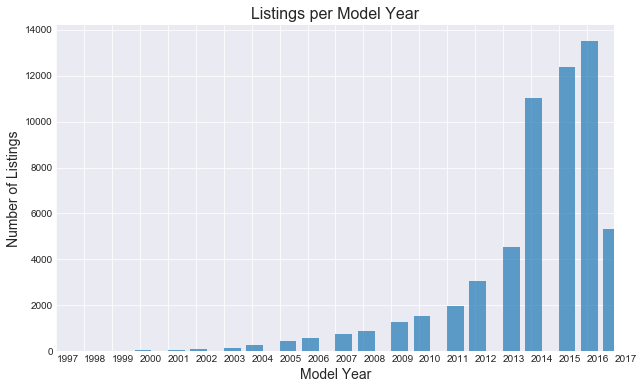

In [114]:
# look at how many listings per Model Year

fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.distplot(car_df.Year,kde=False, hist_kws={"alpha":0.7,'width':0.6})
plt.title('Listings per Model Year',fontsize=16)
plt.xticks(sorted(car_df.Year.unique()),horizontalalignment='left')
plt.ylabel('Number of Listings',fontsize=14)
plt.xlabel('Model Year', fontsize=14)
plt.xlim(1997,2017)


# Save chart as png
plt.savefig('Listings_per_Model_Year.png')
plt.show()

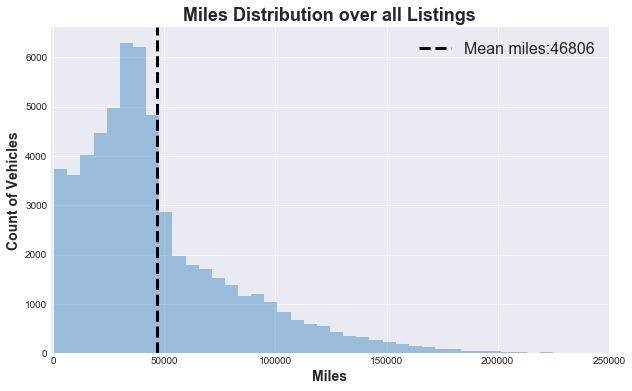

In [115]:
# look at miles overall distribution
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.distplot(car_df.Mileage,kde=False)
plt.xlabel('Miles',fontsize=14,fontweight="bold")
plt.ylabel('Count of Vehicles',fontsize=14,fontweight="bold")
plt.axvline(car_df.Mileage.mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(car_df.Mileage)))
plt.title('Miles Distribution over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,250000)

# Save chart as png
plt.savefig('Overall_Mileage_Distribution.png')
plt.show()

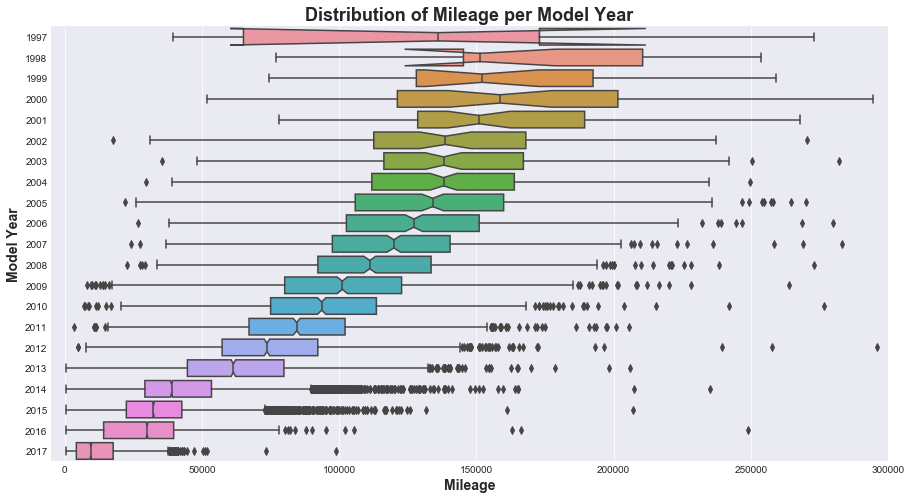

In [116]:
# look at miles by year box and whisker plot
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='Mileage',y='Year',data=car_df,notch=True,orient='h')
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
ax.set_yticklabels(sorted(car_df.Year.unique()))
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Distribution of Mileage per Model Year',fontsize=18,fontweight="bold")
plt.xlim(-5000,300000)

plt.savefig('Distribution_Mileage_Model_Year.png')
plt.show()

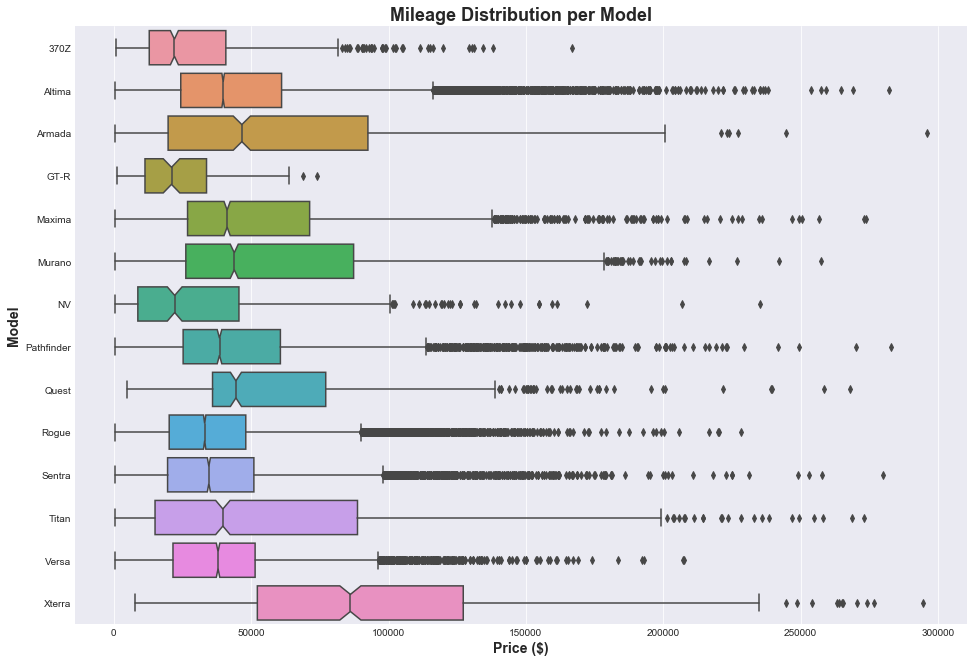

In [117]:
# look at miles by make box and whisker plot

fig = plt.figure(figsize=(16,11))
ax = fig.gca()
sns.boxplot(x='Mileage',y='New_Model',data=car_df,
            order=sorted(car_df.New_Model.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Model',fontsize=14,fontweight="bold")
plt.title('Mileage Distribution per Model',fontsize=18,fontweight="bold")

plt.savefig('Mileage_Distribution_Model.png')
plt.show()

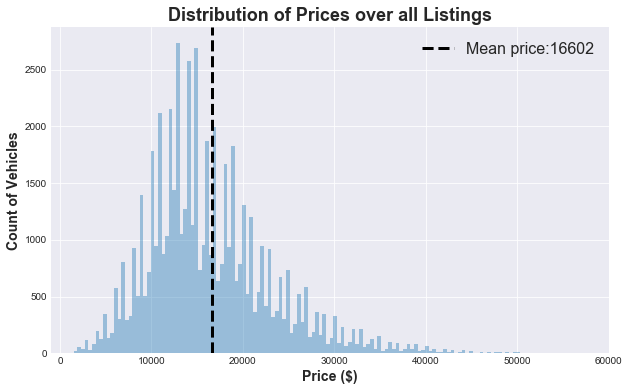

In [118]:
# look at price distribution
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.distplot(car_df.Price,kde=False,bins=300)
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Count of Vehicles',fontsize=14,fontweight="bold")
plt.axvline(car_df.Price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(car_df.Price)))
plt.title('Distribution of Prices over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,60000)

plt.savefig('Overall_Distribution_Price.png')
plt.show()

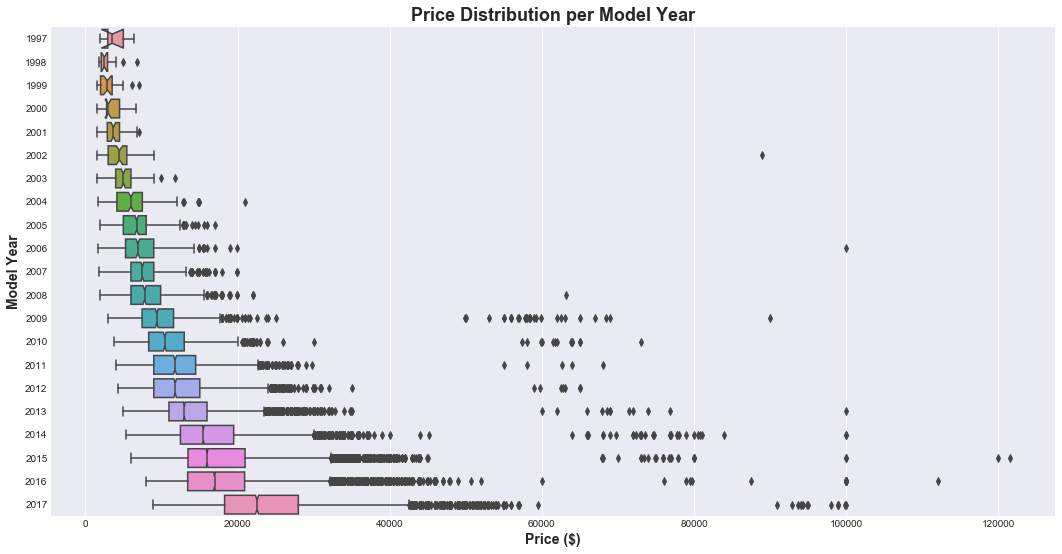

In [119]:
# look at price by year boxplot
fig = plt.figure(figsize=(18,9))
ax = fig.gca()
sns.boxplot(x='Price',y='Year',data=car_df[car_df.Price < 150000],
            order=sorted(car_df.Year.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(nissan_df.Year.unique()))
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Model Year',fontsize=18,fontweight="bold")

plt.savefig('Price_Distribution_Year.png')
plt.show()

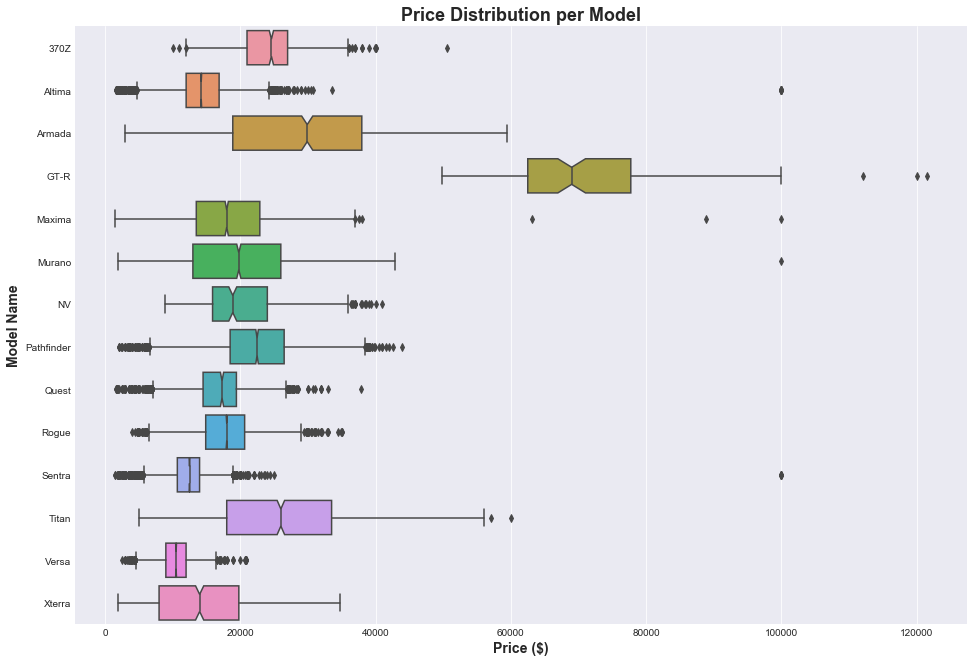

In [120]:
# look at price by make boxplot
# limit upper prices so it's more informative
fig = plt.figure(figsize=(16,11))
ax = fig.gca()
sns.boxplot(x='Price',y='New_Model',data=car_df[car_df.Price < 200000],
            order=sorted(car_df.New_Model.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Model Name',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Model',fontsize=18,fontweight="bold")

plt.savefig('Price_Distribution_Model.png')
plt.show()

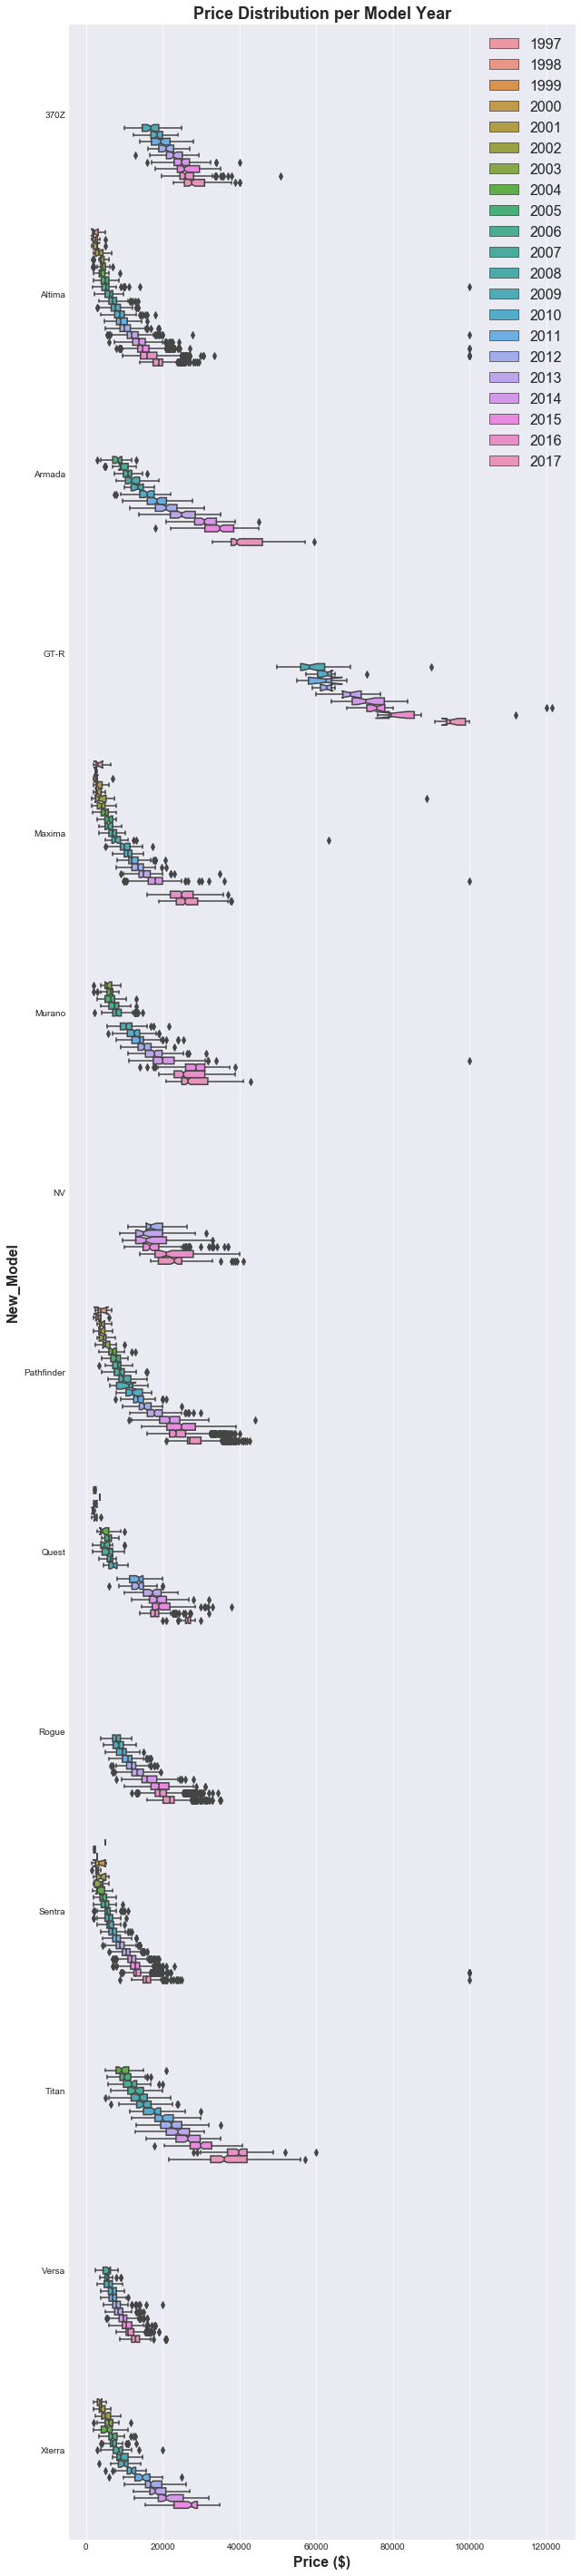

In [121]:
# look at price by model by year boxplot
# limit upper prices so it's more informative
# this has to be very long to view all results

ordered_makes = sorted(car_df.New_Model.unique())

fig = plt.figure(figsize=(10,51))
ax = fig.gca()
sns.boxplot(x='Price',y='New_Model',data=car_df[car_df.Price < 200000],
            order=ordered_makes,hue=(car_df.Year),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=16,fontweight="bold")
plt.ylabel('New_Model',fontsize=16,fontweight="bold")
plt.title('Price Distribution per Model Year',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)

plt.savefig('Price_Distribution_Model_Year.png')
plt.show()

### Findings:

1. The average price of a used Nissan is 16,602 (USD) and the average mileage is 46,806
2. When sorting by the highest price, there are some listings of non-luxury or sport vehicles (Altima, Sentra) that are priced extremely high and seem inaccurate (99,999).  This may be an attempt by the listing party to appear at the top of the list when sorted by price. 
3. GT-Rs have the highest entry price of any used Nissan listing in this dataset. 
4. The lower quartile of price(USD) is 1,500 
  - 25 % 11,950 
  -  50 % 15,000 
  - 75 % 19,990 
  - and upper quartile 121,495
5. Vehicles with fewer than 500 miles: 974, Vehicles with more than 300k miles: 8  

# Determining Residual Value of Nissan Models

In [122]:
#Data Preparation

csv = "Data/Cleaned_Data.csv"
car_df = pd.read_csv(csv)
model_df = car_df.sort_values(by="Year").drop(['Mileage'], axis=1)
model_df = model_df.groupby(["New_Model", "Year"]).mean()
model_df = pd.pivot_table(model_df, values="Price", index="Year", columns="New_Model")
columns = list(model_df)

In [123]:
#Total Depreciation

depr_df = pd.DataFrame(index=model_df.index)
for i in columns:
    new_df = []
    result = []
    chang = []
    x = pd.DataFrame(model_df[i])
    idx = x.first_valid_index()
    idx_value = x.loc[idx,]
    ldx = x.last_valid_index()
    ldx_value = x.loc[ldx,]
    for row in x.itertuples():
        chang = float(row[1]) / float(ldx_value[0])
        result.append(chang)
    new_df = pd.DataFrame(result)
    new_df.index = model_df.index.copy()
    depr_df = depr_df.merge(new_df, left_index=True, right_index=True)
depr_df.columns = model_df.columns
depr_df.head()

New_Model,370Z,Altima,Armada,GT-R,Maxima,Murano,NV,Pathfinder,Quest,Rogue,Sentra,Titan,Versa,Xterra
Year,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,0.139223,NaN,NaN,NaN,NaN,NaN,0.309927,NaN,NaN,NaN
1998,NaN,0.148136,NaN,NaN,0.100176,NaN,NaN,0.153041,0.088726,NaN,0.139297,NaN,NaN,NaN
1999,NaN,0.137638,NaN,NaN,0.121586,NaN,NaN,0.122299,0.140299,NaN,0.179627,NaN,NaN,NaN
2000,NaN,0.151799,NaN,NaN,0.127722,NaN,NaN,0.152472,0.093906,NaN,0.219462,NaN,NaN,0.133238
2001,NaN,0.189651,NaN,NaN,0.123724,NaN,NaN,0.141223,0.075393,NaN,0.177983,NaN,NaN,0.160542


In [124]:
#Annual Depreciation

model_names = {'Model': list(columns)}
annual_depr_df = pd.DataFrame(model_names)
firstyear = []
firstvalue = []
lastyear = []
lastvalue = []
leng = []
percentdelta = []
for i in columns:
    x = pd.Series(model_df[i], dtype=float)
    idx = x.first_valid_index()
    idx_value = x.loc[idx,]
    ldx = x.last_valid_index()
    ldx_value = x.loc[ldx,]
    delta = (ldx_value - idx_value)
    length = ldx - idx
    perdelta = ((delta/length)/delta)*100
    firstyear.append(idx)
    firstvalue.append(idx_value)
    lastyear.append(ldx)
    lastvalue.append(ldx_value)
    leng.append(length)
    percentdelta.append(perdelta)
annual_depr_df["First Year"] = firstyear
annual_depr_df["First Value"] = firstvalue
annual_depr_df["Last Year"] = lastyear
annual_depr_df["Last Value"] = lastvalue
annual_depr_df["Model Longetivity"] = leng
annual_depr_df["Annual Depreciation Rate"] = percentdelta
annual_depr_df = annual_depr_df.sort_values(by="Annual Depreciation Rate")
annual_depr_df.head(21)

,Model,First Year,First Value,Last Year,Last Value,Model Longetivity,Annual Depreciation Rate
4,Maxima,1997,3701.000000,2017,26583.291845,20,5.000000
10,Sentra,1997,4995.000000,2017,16116.693706,20,5.000000
7,Pathfinder,1998,4395.000000,2017,28717.772334,19,5.263158
8,Quest,1998,2338.000000,2017,26350.822222,19,5.263158
1,Altima,1998,2832.750000,2017,19122.604507,19,5.263158
13,Xterra,2000,3543.000000,2015,26591.509259,15,6.666667
5,Murano,2003,5694.153846,2017,28550.277228,14,7.142857
11,Titan,2004,9758.545455,2017,36941.159383,13,7.692308
2,Armada,2005,8371.882353,2017,41873.498542,12,8.333333
12,Versa,2007,5590.916667,2017,12832.414188,10,10.000000


In [125]:
#Five Year Window

five_year_df = pd.DataFrame(index=['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])
for i in columns:
    new_df2 = []
    result2 = []
    chang2 = []
    x = pd.DataFrame(model_df[i])
    idx = model_df[i].first_valid_index()
    idx4 = idx + 4
    idx4_value = x.loc[idx4,]
    x = x.loc[idx:idx4,]
    for row in x.itertuples():
        chang2 = row[1] / idx4_value[0]
        result2.append(chang2)
    new_df2 = pd.DataFrame(result2)
    new_df2.index = five_year_df.index
    five_year_df = five_year_df.merge(new_df2, left_index=True, right_index=True)
five_year_df.columns = model_df.columns
five_year_df.head()

New_Model,370Z,Altima,Armada,GT-R,Maxima,Murano,NV,Pathfinder,Quest,Rogue,Sentra,Titan,Versa,Xterra
Year 1,0.719355,0.697394,0.614780,0.871503,1.125266,0.677376,0.766729,0.942038,0.888635,0.674964,1.741328,0.700178,0.774074,0.642370
Year 2,0.801896,0.647971,0.692993,0.913346,0.809669,0.741584,0.724488,0.752809,1.405169,0.718977,0.782639,0.728843,0.783305,0.774010
Year 3,0.852481,0.714639,0.804921,0.894530,0.982720,0.766799,0.743756,0.938537,0.940517,0.789577,1.009238,0.839694,0.803164,0.951693
Year 4,0.911792,0.892835,0.897621,0.907748,1.032310,0.893616,0.799220,0.869290,0.755099,0.908966,1.233049,0.913788,0.937334,1.069910
Year 5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Depreciation Rate by Model

/Users/johnpatten/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


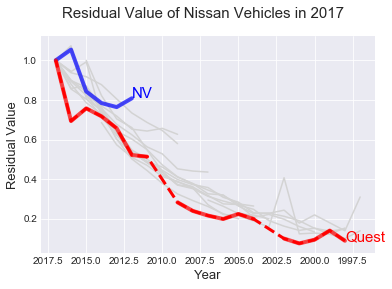

In [126]:
plt.style.use('seaborn-darkgrid')
fig,ax = plt.subplots()
columns = list(depr_df)
for i in columns:
    x=pd.Series(depr_df[i], dtype=float)
    idx=x.first_valid_index()
    ldx=x.last_valid_index()
    ldx2=x.last_valid_index()+1
    ax.plot(range(idx, ldx2), x.loc[idx:ldx,], color="lightgray")
ax.set_xlim(ax.get_xlim()[::-1])
best=pd.Series(depr_df['NV'], dtype=float)
idx_best=best.first_valid_index()
ldx_best=best.last_valid_index()
ldx2_best=best.last_valid_index()+1
plt.plot(range(idx_best, ldx2_best), best.loc[idx_best:ldx_best,], marker='', color='blue', linewidth=4, alpha=0.7)
plt.text(idx_best, best.loc[idx_best], 'NV', horizontalalignment='left', fontsize=15, color='blue')
worst=pd.Series(depr_df['Quest'], dtype=float)
mask=np.isfinite(worst)
idx_worst=worst.first_valid_index()
ldx_worst=worst.last_valid_index()
ldx2_worst=worst.last_valid_index()+1
plt.plot(range(idx_worst, ldx2_worst), worst.loc[idx_worst:ldx_worst,], marker='', color='red', linewidth=4, alpha=0.7)
line, = ax.plot(worst[mask], ls="--",lw=1, linewidth=3, color='red')
plt.text(idx_worst, worst.loc[idx_worst], 'Quest', horizontalalignment='left', fontsize=15, color='red')
fig.suptitle("Residual Value of Nissan Vehicles in 2017", fontsize=15)
ax.set_xlabel("Year", fontsize=13)
ax.xaxis.TickLabelFormat = '%d'
ax.set_ylabel("Residual Value", fontsize=13)
plt.show()

## Depreciation Rate based on Genesis Year

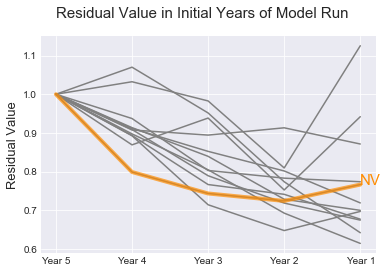

In [127]:
five_year_df = pd.DataFrame(index=['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])
for i in columns:
    new_df2 = []
    result2 = []
    chang2 = []
    x = pd.DataFrame(model_df[i])
    idx = model_df[i].first_valid_index()
    idx4 = idx + 4
    idx4_value = x.loc[idx4,]
    x = x.loc[idx:idx4,]
    for row in x.itertuples():
        chang2 = row[1] / idx4_value[0]
        result2.append(chang2)
    new_df2 = pd.DataFrame(result2)
    new_df2.index = five_year_df.index
    five_year_df = five_year_df.merge(new_df2, left_index=True, right_index=True)
five_year_df.columns = model_df.columns
fig,ax = plt.subplots()
five_year_df = five_year_df.drop(columns=['Quest', 'Sentra'])
plt.plot(five_year_df, color="gray")
ax.set_xlim(ax.get_xlim()[::-1])
NV = pd.Series(five_year_df['NV'])
plt.plot(NV, marker='', color='darkorange', linewidth=4, alpha=0.7)
plt.text('Year 1', NV[0], 'NV', horizontalalignment='left', fontsize=15, color='darkorange')
fig.suptitle("Residual Value in Initial Years of Model Run", fontsize=15)
ax.set_ylabel("Residual Value", fontsize=13)
residualfive = plt

### Findings:

1. Residual value is related to the lifespan of the *model*.
2. Possible explanation: novelty vs. substitution.
3. Best car to buy this year for resale next year?
    - New-ish year of the newest model
    - Older year of an older model

# Vehicles Available by Model Year in Overall Market

In [128]:
csv = "Data/Cleaned_Data.csv"
car_df = pd.read_csv(csv)
car_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [129]:
# How many of each model are in the overall market?
counts = car_df["New_Model"].value_counts()
counts

Altima        15967
Rogue         10491
Sentra         7664
Versa          5510
Pathfinder     4434
Murano         4338
Maxima         3785
Titan          1994
Armada         1334
Quest          1033
Xterra          938
370Z            902
NV              505
GT-R            137
Name: New_Model, dtype: int64

In [130]:
# How many of each model by model year are in the market?
model_df = car_df.sort_values(by="Year").drop(['Price'], axis=1)
model_df = model_df.groupby(["New_Model", "Year"]).count()
model_df = pd.pivot_table(model_df, values="Mileage", index="Year", columns="New_Model")
model_df

New_Model,370Z,Altima,Armada,GT-R,Maxima,Murano,NV,Pathfinder,Quest,Rogue,Sentra,Titan,Versa,Xterra
Year,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1998,NaN,4.0,NaN,NaN,3.0,NaN,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN
1999,NaN,10.0,NaN,NaN,6.0,NaN,NaN,6.0,1.0,NaN,1.0,NaN,NaN,NaN
2000,NaN,5.0,NaN,NaN,15.0,NaN,NaN,6.0,2.0,NaN,5.0,NaN,NaN,13.0
2001,NaN,13.0,NaN,NaN,19.0,NaN,NaN,15.0,3.0,NaN,4.0,NaN,NaN,17.0
2002,NaN,22.0,NaN,NaN,12.0,NaN,NaN,12.0,4.0,NaN,10.0,NaN,NaN,27.0
2003,NaN,44.0,NaN,NaN,18.0,26.0,NaN,16.0,NaN,NaN,12.0,NaN,NaN,29.0
2004,NaN,18.0,NaN,NaN,38.0,51.0,NaN,42.0,17.0,NaN,30.0,44.0,NaN,43.0
2005,NaN,92.0,34.0,NaN,32.0,88.0,NaN,61.0,14.0,NaN,34.0,67.0,NaN,48.0


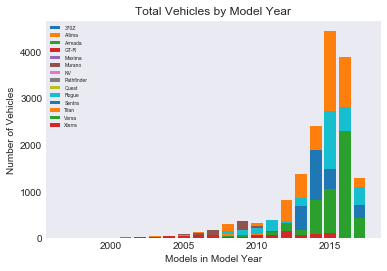

In [131]:
# Bar chart showing how many of each vehicle by model year are in the overall market.
fig,ax = plt.subplots()
columns = list(model_df)
plt.xlabel("Models in Model Year")
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicles by Model Year')

plt.grid()
for i in columns:
    x=pd.Series(model_df[i], dtype=float)
    idx=x.first_valid_index()
    ldx=x.last_valid_index()
    ldx2=x.last_valid_index()+1
    ax.bar(range(idx, ldx2), x.loc[idx:ldx], label=i)

plt.legend(loc='upper left',fontsize=5)

plt.savefig('Total Vehicles by Model Year')

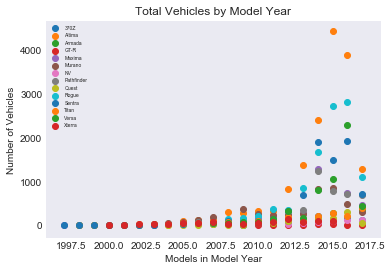

In [132]:
# Scatter chart to see if the data looks any different - ...how many of each vehicle by model year are in the overall market.
fig,ax = plt.subplots()
columns = list(model_df)
plt.xlabel("Models in Model Year")
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicles by Model Year')

plt.grid()
for i in columns:
    x=pd.Series(model_df[i], dtype=float)
    idx=x.first_valid_index()
    ldx=x.last_valid_index()
    ldx2=x.last_valid_index()+1
    ax.scatter(range(idx, ldx2), x.loc[idx:ldx], label=i)

plt.legend(loc='upper left',fontsize=5)
plt.savefig('Total Vehicles by Model Year - scatter')

In [133]:
CarCounts = car_df["Year"].value_counts()
car_df["CarCounts"] = CarCounts
car_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model,CarCounts
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima,NaN
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima,NaN
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima,NaN
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra,NaN
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima,NaN


In [134]:
model_df = car_df.sort_values(by="Year").drop(['Price'], axis=1)
model_df = pd.pivot_table(model_df, values="Mileage", index="Year", columns="New_Model")
columns = list(model_df)
model_df

New_Model,370Z,Altima,Armada,GT-R,Maxima,Murano,NV,Pathfinder,Quest,Rogue,Sentra,Titan,Versa,Xterra
Year,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,161766.250000,NaN,NaN,NaN,NaN,NaN,39484.000000,NaN,NaN,NaN
1998,NaN,187017.000000,NaN,NaN,157838.333333,NaN,NaN,164149.333333,133823.500000,NaN,199282.500000,NaN,NaN,NaN
1999,NaN,166792.500000,NaN,NaN,146557.500000,NaN,NaN,159798.500000,104448.000000,NaN,147815.000000,NaN,NaN,NaN
2000,NaN,145632.600000,NaN,NaN,140921.733333,NaN,NaN,159709.166667,174214.500000,NaN,129104.400000,NaN,NaN,275615.076923
2001,NaN,149427.538462,NaN,NaN,165790.894737,NaN,NaN,156073.933333,194257.000000,NaN,129907.500000,NaN,NaN,170977.000000
2002,NaN,139968.500000,NaN,NaN,151276.583333,NaN,NaN,149288.833333,162565.500000,NaN,107171.500000,NaN,NaN,147705.074074
2003,NaN,147460.659091,NaN,NaN,161843.111111,128912.346154,NaN,151686.812500,NaN,NaN,119729.666667,NaN,NaN,138125.965517
2004,NaN,156974.277778,NaN,NaN,136322.973684,138633.411765,NaN,137057.238095,121300.941176,NaN,129768.433333,140878.022727,NaN,146873.744186
2005,NaN,137203.489130,139259.647059,NaN,149061.875000,136874.136364,NaN,137451.442623,114369.785714,NaN,116337.705882,141928.223881,NaN,136909.958333


In [135]:
# Data showing count of models by model year in market.
cdf = car_df.New_Model.groupby(car_df.Year).value_counts()
print(cdf)

Year  New_Model 
1997  Maxima          4
      Sentra          1
1998  Altima          4
      Maxima          3
      Pathfinder      3
                   ... 
2017  Murano        303
      370Z          122
      NV            121
      Quest          45
      GT-R           13
Name: New_Model, Length: 200, dtype: int64


Text(420.375, 0.5, 'Number of Vehicles')

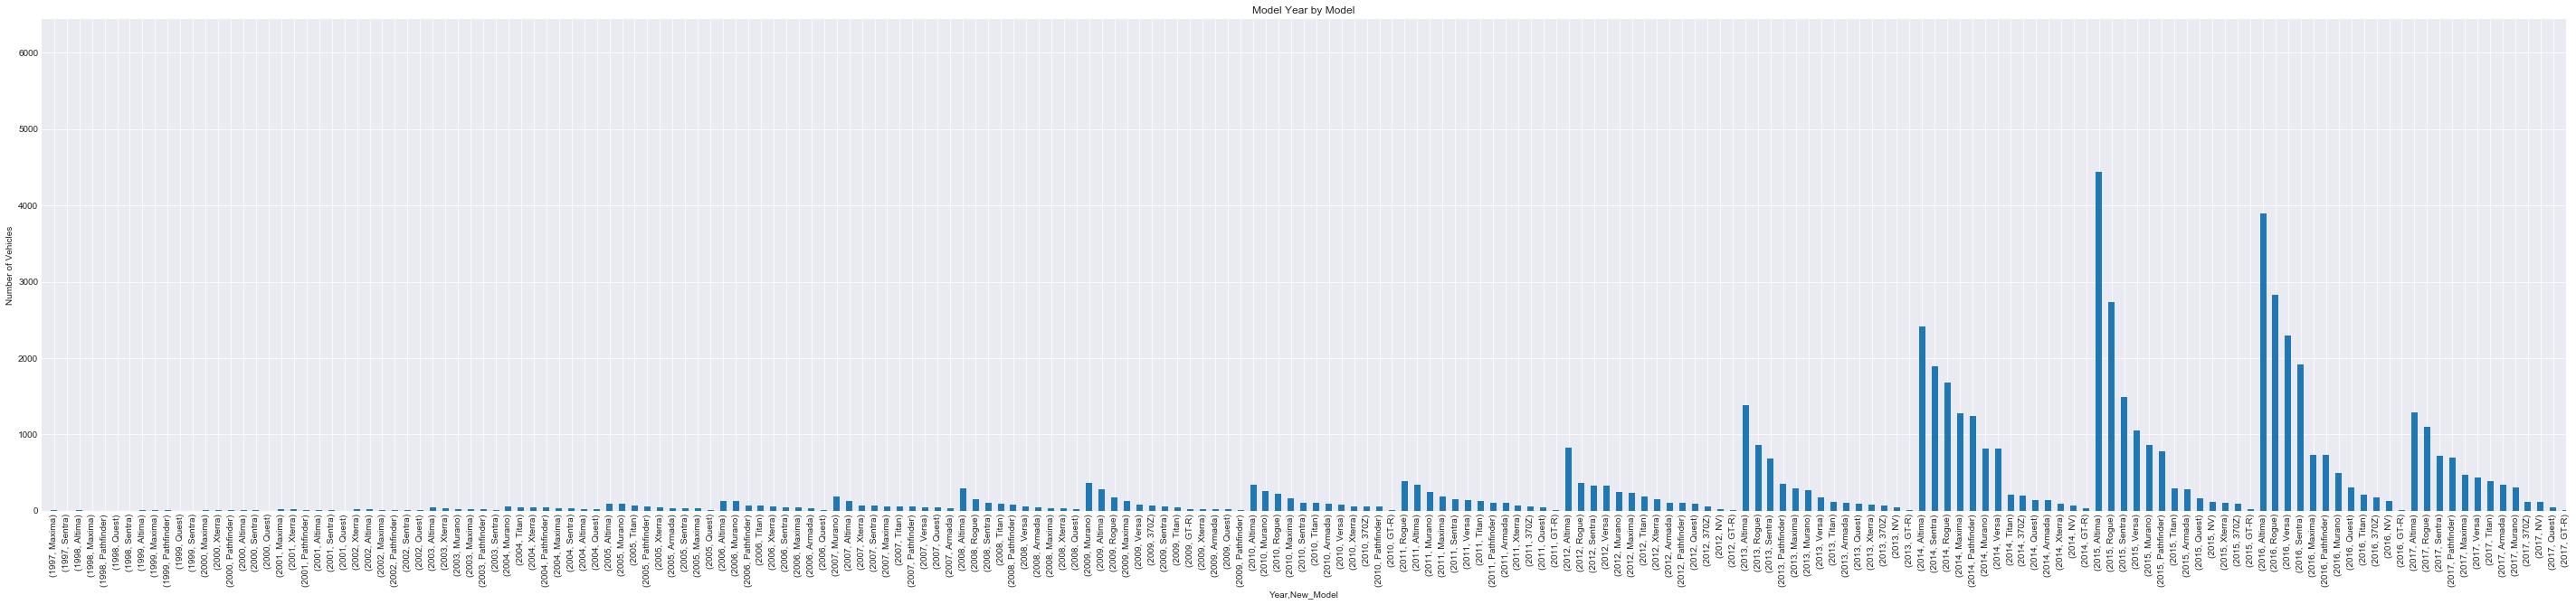

In [136]:
# Graph model year by model to see how many of each are available in market.
x_axis = np.arange(len(cdf))
cdf.plot.bar(subplots=True, figsize=(50,10))
# plt.bar(x_axis,cdf, color='r', alpha=0.5, align="center")
plt.savefig('MY by Model.png')

plt.xlim(-1, len(x_axis)-1)
plt.ylim(0, max(cdf)+2000)
plt.title("Model Year by Model")
plt.ylabel('Number of Vehicles')
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, models)

In [137]:
# See what data looks like listing model by model year.
cdf = car_df.Year.groupby(car_df.New_Model).value_counts()
cdf.head()

New_Model  Year
370Z       2014    205
           2016    180
           2017    122
           2015     87
           2013     71
Name: Year, dtype: int64

Text(420.375, 0.5, 'Number of Vehicles')

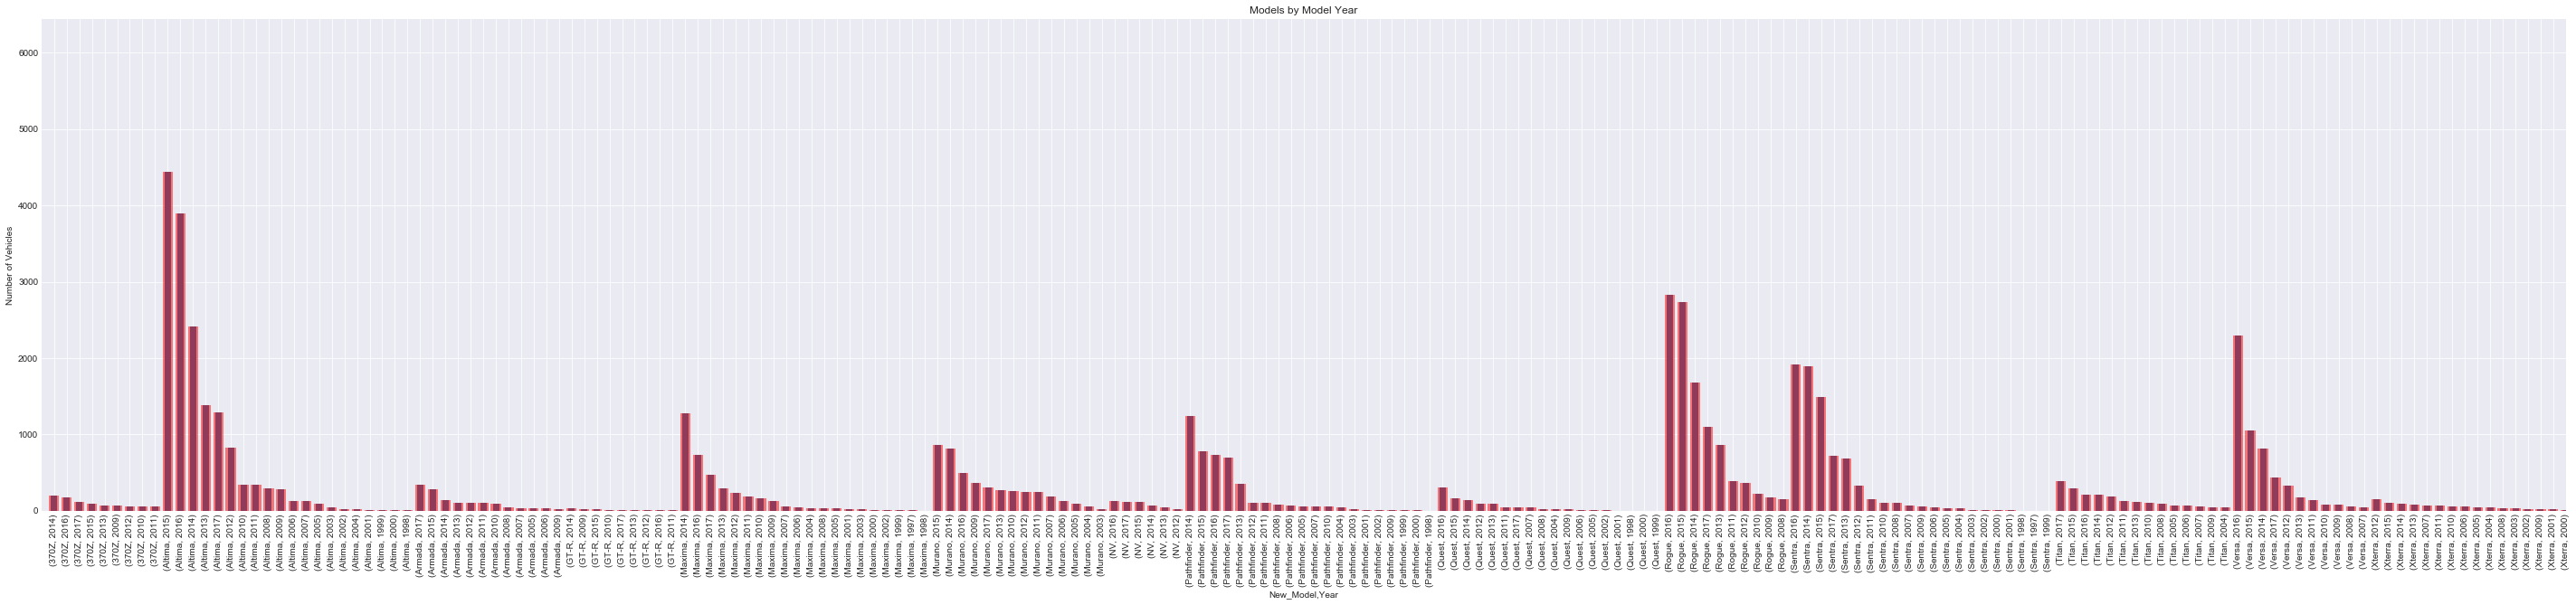

In [138]:
#Graph model by modely year to see how many of each model year are available of desired vehicle.
x_axis = np.arange(len(cdf))
cdf.plot.bar(subplots=True, figsize=(50,10))
plt.bar(x_axis,cdf, color='r', alpha=0.5, align="center")
plt.savefig('Model by Model Year.png')

plt.xlim(-1, len(x_axis)-1)
plt.ylim(0, max(cdf)+2000)
plt.title("Models by Model Year")
plt.ylabel('Number of Vehicles')
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, models)

# Vehicle Availability in TN and Surrounding Area & General Trends

In [139]:
#Notes
#Nissan: 66,250
#when grouped by state --> 59 (need to consolidate duplicates)
#Models in Tennessee: 'Versa', 'Altima', 'Sentra', 'Rogue', 'Maxima', 'Murano','Titan', 'Quest', 'Pathfinder', 'Xterra', 'NV', 'Armada', '370Z','GT-R'

In [140]:
#Findings
#Tennessee: 1976 listings, Altima is the most available
#United States: 
    #southeast/southwest: Altima most available (only 1 state did not have Altima as highest number of listings)
    #midwest (plains): there are more states with Rogue as highest number of listings than Altima as the highest
    #Alaska: only state with most Pathfinder listings
    #Nevada/Hawaii: only two states with most Versa listings

In [141]:
#Name dataframe for cleaned data csv
csv = "Data/Cleaned_Data.csv"

#Read the data
car_df = pd.read_csv(csv)

In [142]:
#List of only Nissan vehicles
nissan_df = car_df.loc[car_df["Make"]=="Nissan"]
nissan_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [143]:
#Combining duplicate states (i.e. Va and VA)

nissan_df = nissan_df.replace(to_replace = " Va", value = " VA", regex=False)
nissan_df = nissan_df.replace(to_replace = " Fl", value = " FL", regex=False)
nissan_df = nissan_df.replace(to_replace = " Az", value = " AZ", regex=False)
nissan_df = nissan_df.replace(to_replace = " Ca", value = " CA", regex=False)
nissan_df = nissan_df.replace(to_replace = " Ga", value = " GA", regex=False)
nissan_df = nissan_df.replace(to_replace = " ga", value = " GA", regex=False)
nissan_df = nissan_df.replace(to_replace = " Md", value = " MD", regex=False)
nissan_df = nissan_df.replace(to_replace = " Oh", value = " OH", regex=False)

In [144]:
#Determining model availability across the United States
nissan_df.set_index('Vin')
nissanmodel = nissan_df.groupby('New_Model')
nissanmodelcount = nissanmodel['Vin'].count()
nissanmodelcount

New_Model
370Z            902
Altima        15967
Armada         1334
GT-R            137
Maxima         3785
Murano         4338
NV              505
Pathfinder     4434
Quest          1033
Rogue         10491
Sentra         7664
Titan          1994
Versa          5510
Xterra          938
Name: Vin, dtype: int64

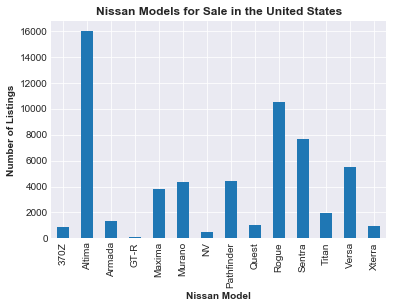

In [145]:
#Graphing model availability in the United States

nissanmodelcount.plot.bar()
plt.title('Nissan Models for Sale in the United States', fontweight='bold')
plt.xlabel('Nissan Model', fontweight='bold')
plt.ylabel('Number of Listings', fontweight='bold')
plt.savefig('availability_US.png')
plt.show()

In [146]:
#Determining model availability in Tennessee

tn_df = nissan_df.loc[nissan_df['State']==' TN']
tn_df.set_index('Vin')
tnmodel = tn_df.groupby('New_Model')
tnmodelcount = tnmodel['Vin'].count()

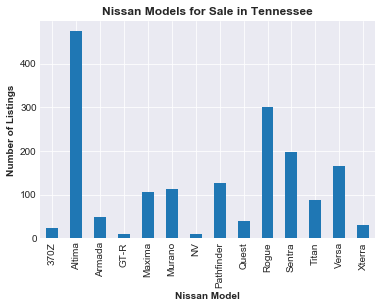

In [147]:
#Graphing model availability in Tennessee

tnmodelcount.plot.bar()
plt.title('Nissan Models for Sale in Tennessee', fontweight='bold')
plt.xlabel('Nissan Model', fontweight='bold')
plt.ylabel('Number of Listings', fontweight='bold')
plt.savefig('availability_tennessee.png')
plt.show()

In [148]:
#Grouping by state and new model --> exporting to csv

statecount = nissan_df.groupby(['State','New_Model'])
modelcount = statecount.count()
modelcount.to_csv('model_count.csv')

In [149]:
#Reading in new data frame for cleaned csv from above
secondcsv = "state_models.csv"

mostavailable_df = pd.read_csv(secondcsv)
mostavailable_df

,State,Most Available Model,Number of Listings,Region
0,AK,Pathfinder,36,Far West
1,AL,Altima,380,Southeast
2,AR,Altima,167,Southeast
3,AZ,Altima,451,Southwest
4,CA,Altima,1513,Far West
5,CO,Rogue,337,Rocky Mountain
6,CT,Altima,239,New England
7,DC,Altima,2,Mideast
8,DE,Rogue,51,Mideast
9,FL,Altima,1535,Southeast


In [150]:
#Grouping the most available car for each state by region
region = mostavailable_df.groupby('Region')
regioncount = region['Most Available Model'].value_counts()
regioncount

Region          Most Available Model
Far West        Altima                   3
                Altima/Versa             1
                Pathfinder               1
                Versa                    1
Great Lakes     Altima                   4
                Rogue                    1
Mideast         Altima                   4
                Rogue                    2
Midwest         Rogue                    4
                Altima                   3
New England     Altima                   4
                Rogue                    2
Rocky Mountain  Altima                   4
                Rogue                    1
Southeast       Altima                  11
                Rogue                    1
Southwest       Altima                   4
Name: Most Available Model, dtype: int64

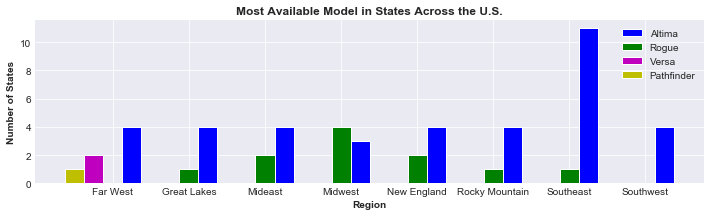

In [151]:
#Graphing the most available car for states by region

plt.figure(figsize=(12,3))

barWidth = 0.25

bars1 = [4,4,4,3,4,4,11,4]
bars2 = [0,1,2,4,2,1,1,0]
bars3 = [2,0,0,0,0,0,0,0]
bars4 = [1,0,0,0,0,0,0,0]


r1 = np.arange(len(bars1))
r2 = [x - barWidth for x in r1]
r3 = [x - barWidth for x in r2]
r4 = [x - barWidth for x in r3]


plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Altima')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='Rogue')
plt.bar(r3, bars3, color='m', width=barWidth, edgecolor='white', label='Versa')
plt.bar(r4, bars4, color='y', width=barWidth, edgecolor='white', label='Pathfinder')


plt.xlabel('Region', fontweight='bold')
plt.ylabel('Number of States', fontweight='bold')
plt.title('Most Available Model in States Across the U.S.', fontweight='bold')
plt.xticks([r - barWidth for r in range(len(bars1))], ['Far West', 'Great Lakes', 'Mideast', 'Midwest', 'New England', 'Rocky Mountain', 'Southeast', 'Southwest'])

plt.legend()
plt.savefig('region_availability.png')
plt.show()

In [152]:
#Grouping the most available car for each state by model
carmodel = mostavailable_df.groupby('Most Available Model')
carmodelcount = carmodel['Region'].value_counts()
carmodelcount

Most Available Model  Region        
Altima                Southeast         11
                      Great Lakes        4
                      Mideast            4
                      New England        4
                      Rocky Mountain     4
                      Southwest          4
                      Far West           3
                      Midwest            3
Altima/Versa          Far West           1
Pathfinder            Far West           1
Rogue                 Midwest            4
                      Mideast            2
                      New England        2
                      Great Lakes        1
                      Rocky Mountain     1
                      Southeast          1
Versa                 Far West           1
Name: Region, dtype: int64

In [153]:
#determining greatest availability across the country (to hone in on specific model desired)

greatestavailability = modelcount['Vin'].sort_values(ascending=False)
greatestavailability

State  New_Model
 TX    Altima       1651
 FL    Altima       1535
 CA    Altima       1513
       Sentra       1248
 TX    Rogue         925
                    ... 
 ND    Maxima          1
 SD    Versa           1
 ME    Quest           1
 UT    NV              1
 AK    370Z            1
Name: Vin, Length: 649, dtype: int64